In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read_path_module import read_data_relative_path
from write_path_module import write_data_relative_path

### - Import the dataset

In [2]:
df = read_data_relative_path('./data/CDC_Natality/2003_2018.csv', data_type='csv')
df['Birth Date'] = pd.to_datetime(df['Birth Date'])
df['Conception Date'] = pd.to_datetime(df['Conception Date']).dt.normalize()
df.sample(2)

,Birth Year,Conception Year,Birth Month,Conception Month,Birth Month Code,Conception Month Code,Birth Date,Conception Date,State,State Acronym,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,Notes
95843,2016,2016,September,January,9,1,2016-09-15,2016-01-01,Missouri,SC,29,Greene County,29077,325.0,27.60,38.79,NaN
107737,2018,2017,April,August,4,8,2018-04-15,2017-08-01,Missouri,NC,29,Greene County,29077,249.0,27.33,38.70,NaN


### - Get unique list of county codes

In [3]:
lst_county_codes = list(df['County Code'].unique())

### - Births per county over time (Line)

In [4]:
def Random_County_Plotter(df, lst_county_codes, time='birth'):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    
    if time.lower() == 'birth':
        df_county.index = df_county['Birth Date']
    else:
        df_county.index = df_county['Conception Date']
    

    df_county['Births'].plot(figsize=(15,6), legend=True, label='Raw')
    df_county['Births'].resample("2m").median().plot(figsize=(15,6), legend=True, label='2 Month Median Resample')
    df_county['Births'].rolling(4).median().plot(figsize=(15,6), legend=True, label='4 Month Rolling Median')

    plt.xlabel('Birth Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()


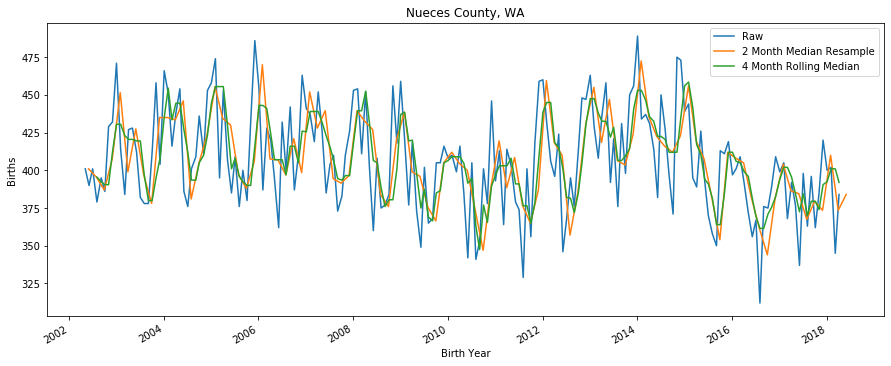

In [5]:
Random_County_Plotter(df, lst_county_codes, time='conception')

### - Births per county over each Birth Year (Line)

In [6]:
def Random_County_Plotter_Annual(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    
    low = df_county['Birth Year'].min()
    high = df_county['Birth Year'].max()
    lst_yrs = list(range(low, high+1))
    
    plt.figure(figsize=(20,10))

    for yr in lst_yrs:
        x = df_county[df_county['Birth Year'] == yr]['Birth Month Code']
        y = df_county[df_county['Birth Year'] == yr]['Births']
        plt.plot(x,y)
    
    plt.xticks(x, labels=df_county['Birth Month'].unique(), rotation='45')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

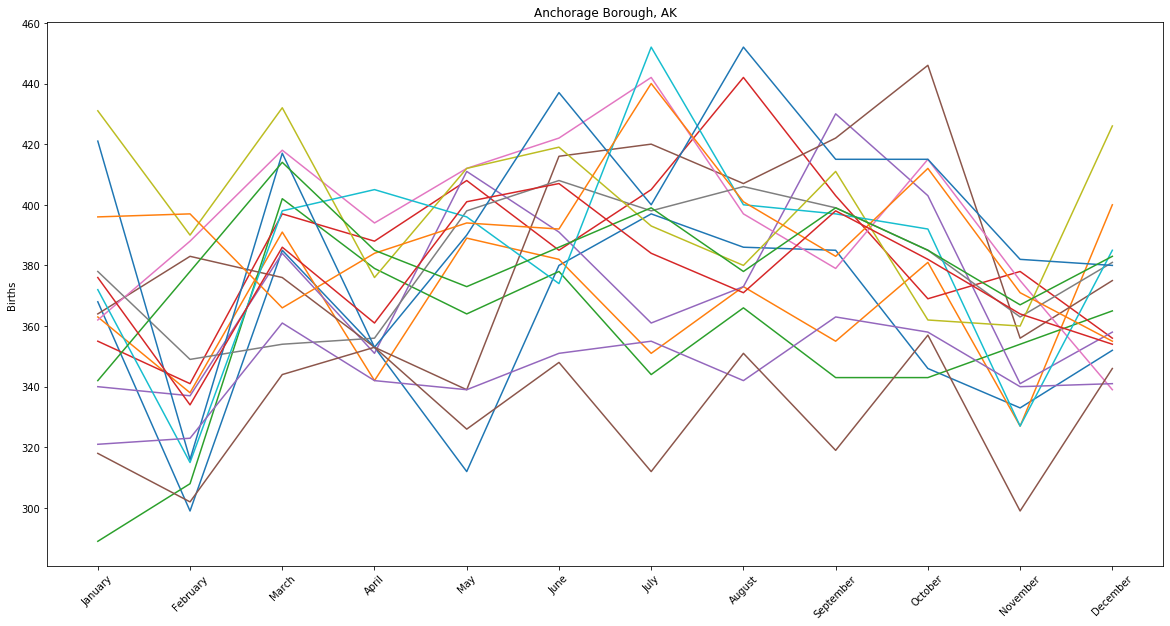

In [7]:
Random_County_Plotter_Annual(df, lst_county_codes)

### - Births per county over each Birth Year (Scatter)

In [8]:
def Random_County_Plotter_Scatter(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]

    x = df_county['Birth Month Code']
    y = df_county['Births']
    
    plt.figure(figsize=(20,8))
    
    plt.scatter(x, y)

    plt.xticks(x, labels=df_county['Birth Month'].unique(), rotation='45')
    plt.xlabel('Birth Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

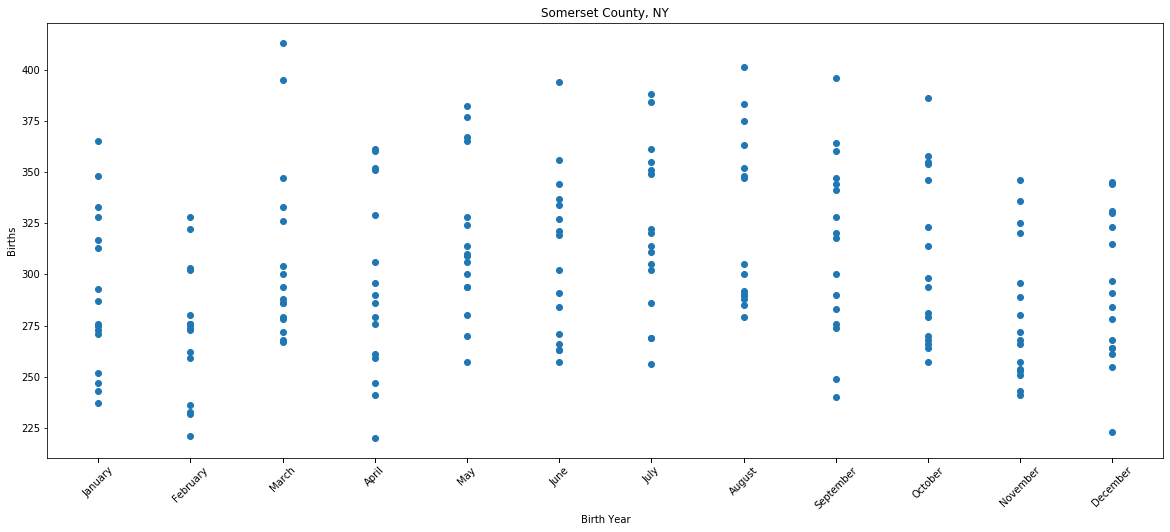

In [9]:
Random_County_Plotter_Scatter(df, lst_county_codes)

### - Births per county over each Birth Year (Boxplot)

In [10]:
def Random_County_Plotter_Boxplot(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]

    
    df_county.boxplot(column='Births', by='Birth Month Code', figsize=(15,6))

    plt.xlabel('Birth Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

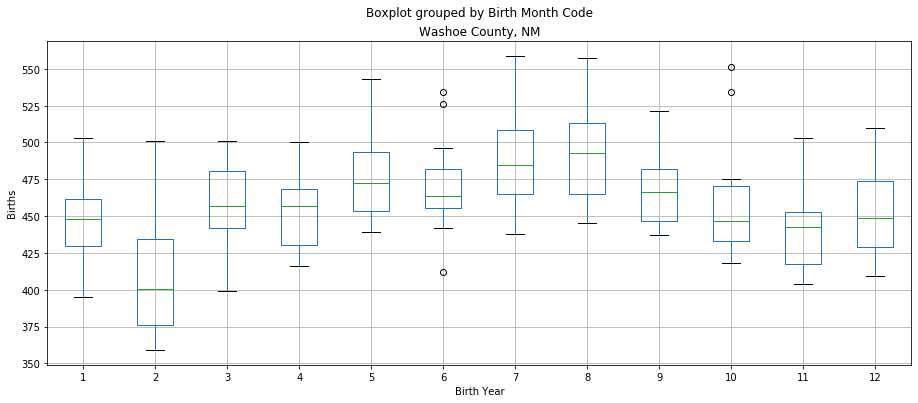

In [11]:
Random_County_Plotter_Boxplot(df, lst_county_codes)

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 